# 直線近似から予測モデルへ

ボストンハウジング価格という有名問題を解きながら、線形回帰を学んでいきましょう。


__モジュールの準備__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
try:
    import japanize_matplotlib #日本語化 matplotlib 
    sns.set(font="IPAexGothic") #日本語フォント設定
except ModuleNotFoundError:
    pass

## 線形回帰

線形回帰は、もともと統計学の回帰分析の一種です。説明変数($x_0, x_1, .., x_n$)と目的変数$y$の組が与えられたとき、説明変数と目的変数の関係を表す最もらしい線形関数を求める分析です。

* 単回帰: $y = a x + b$
* 重回帰: $y = a_0 x_0 + a_1 x_1 + .. + a_n x_n + b$

まず、一番シンプルな単回帰で、原理を確認しておきましょう。

<div class="admonition tip">

**例題（単回帰）**

(1,1),(2,3),(4,3),(6,5),(7,4) というデータの組に対して、
最小二乗法を用いて、もっともらしい直線 $y = ax + b$を求めよう。

</div>

まず、データをグラフで見ておきましょう。


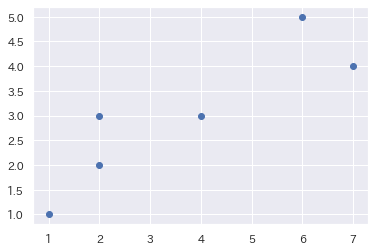

In [2]:
x = np.array([1,2,2,4,6,7])
y = np.array([1,3,2,3,5,4])

plt.scatter(x, y)
plt.show()

### 最小二乗法

もっともらしい直線の式を $y = a x + b$とおきます。
すると、その直線と点$(x_i, y_i)$とのy方向の誤差は、
$|y_i - a xi - b|$となります。
最小二乗法は、**この誤差の二乗和が最小になるとき、最もらしい直線である**とします。

つまり、次の$E$が最小になるa, bを求めます。

$$
E = \sum ^n _ {i = 1}(ax_i +b - y)^2
$$

<img src="https://mathtrain.jp/wp-content/uploads/2014/12/leastsquare-300x282.png">


### NumPyによる解法

NumPyを使って、最もらしい直線$y = ax+b$を求めてみましょう。

$$
E = \sum ^n _ {i = 1}(ax_i +b - y)^2
$$

先に数学的な準備をしておきます。
$E$の最小値を求めるため、$a,b$の関数とみなし、偏微分します。

$$
 \frac{\partial E}{\partial a} = \sum ^n_{i= 1} 2x_i (ax _i+ b - y_i) = 0 \\
 \frac{\partial E}{\partial b} = \sum ^n_{i= 1}(ax _i+ b - y_i) = 0
$$

実際の式の変形は、[数学がお好きな子](https://ja.wikipedia.org/wiki/%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%97%E6%B3%95)にお任せします。
結論だけ書いておくと、a,bについて整理すると、

$$
a = {\sum ^n _ {i = 1}x_i y_i - {1 \over n}\sum^n_{i = 1}x_i \sum^n_{i = 1}y_i \over \sum^n_{i = 1}x_i^2 - {1 \over n}(\sum^n_{i = 1}x_i)^2} \\
b ={ 1\over n}\sum^n_{i= 1}(y_i - ax_i)　
$$


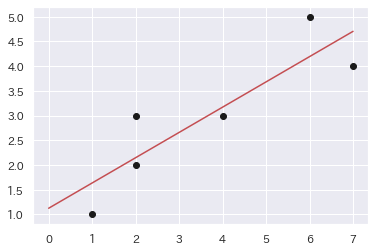

a = 0.5113636363636365 b = 1.1249999999999998


In [3]:
x = np.array([1,2,2,4,6,7])
y = np.array([1,3,2,3,5,4])


def reg1dim(x, y):
    n = len(x)
    a = ((np.dot(x, y)- y.sum() * x.sum()/n) / ((x ** 2).sum() - x.sum()**2 / n))
    b = (y.sum() - a * x.sum())/n
    return a, b

a, b = reg1dim(x, y)
# y2 = a * x2 + b としてプロット
x2 = np.linspace(0, 7, 100)
y2 = a * x2 + b

plt.scatter(x, y, color="k")
plt.plot(x2, y2, color="r")
plt.show()
print("a =", a, "b =", b)


よって、NumPyによって求められた回帰モデルは$y = 0.51 x + 1.12$ となります。

### 車輪を再発明しない

線形回帰モデルを計算するアルゴリズムは、
skleran モジュールのLinearRegressionクラスで提供されています。
LinearRegression クラスから、新しいモデルを生成し、$(x,y)$のペアをフィットさせるだけで、
線形回帰モデルを学習することができます。

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = x.reshape(-1, 1) # sklearn 用に変形
model.fit(x, y)

LinearRegression()

線形回帰モデル$y=ax+b$の係数$a$と切片$b$は、それぞれ`model.coef_`と`model.intercept_`で取得できます。


In [5]:
print(model.coef_, model.intercept_)

[0.51136364] 1.1250000000000002


<div class="alert alert-warning">

なぜ線形回帰は機械学習なのか？

機械学習は、次回もう少し詳しく説明しますが、
線形回帰モデルは未知のデータを予想することに使えます。

</div>


### 単回帰と重回帰

重回帰分析は、単回帰分析の説明変数を2つ以上に増やしたモデルです。

* 単回帰: $y = a x + b$
* 重回帰: $y = a_0 x_0 + a_1 x_1 + .. + a_n x_n + b$



## ボストンハウジング価格

ボストンハウジング価格データセットは、米国国勢調査局が収集した情報から抽出＆加工して作成された「1970年代後半における（米国マサチューセッツ州にある）ボストンの住宅価格」の表形式データセットです。データサイエンスや統計処理（線形回帰）の練習データセットとして広く使われています。





In [6]:
data = pd.read_csv('boston2.csv')
data.head() # 最初の５行を表示

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


本資料では、オリジナルのボストンハウジング価格データセットから、公平性の観点から
一部修正したデータを用いています。

含まれる属性は、次の通りです。

* `crim`:	人口1人当たりの犯罪発生数
* `zn`:	25000平方フィート以上の居住区間の占める割合
* `indus`:	小売業以外の商業が占める面積の割合
* `chas`:	チャールズ川によるダミー変数（1：川の周辺，0：それ以外）
* `nox`:	NOxの濃度
* `rm`:	住居の平均部屋数
* `age`:	1940年より前に建てられた物件の割合
* `dis`:	5つのボストン市の雇用施設からの距離
* `rad`:	環状高速道路へのアクセスのしやすさ
* `tax`:	＄10,000ドルあたりの不動産税率の総計
* `ptratio`:	町毎の児童と教師の比率
* `lstat`:	給与の低い職業に従事する人口の割合
* `medv`:	住宅価格 (所有者が占有している家屋の＄1000単位の中央値)

<div class="alert alert-info">

公平性（Fairness）

AI／機械学習（ML）における公平性とは、不公平なバイアスに基づき学習した機械学習モデルが不当な差別（人種差別／民族差別や、性別差別、文化差別／地域差別など）を引き起さないように不公平なバイアスを排除すること

</div>


### 重回帰による分析

ボストンハウジング価格では、データセットからいくつかの属性を説明変数として選んで住宅価格(`medv`)を予測する回帰モデルを作成します。

最初の例は、説明変数ひとつの単回帰分析だったため、ここでは２つ以上選んで重回帰分析に挑戦してみます。

<div class="alert alert-info">

Let's try

住宅価格に影響を与えそうな属性（説明変数）をふたつ選んでみよう。

</div>

以下の解説は、とりあえず`indus`と`lstat`を説明変数として、説明します。
みなさんが、選んだ説明変数に変えて試してみてください。




In [8]:
X = data[['indus', 'lstat']]  # 説明変数
y = data['medv'] # 目的変数
X.head()

,indus,lstat
0,2.31,4.98
1,7.07,9.14
2,7.07,4.03
3,2.18,2.94
4,2.18,5.33


In [9]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

`indus`と`lstat`の値を適当に与えて、住宅価格の予想モデルをしてみましょう。

In [11]:
model.predict([(3.00, 4.00)])

array([31.00571028])

どれくらい正しいのかわかりませんが、
予測モデルができて、販売価格が予想できるようになりました。

__重回帰モデルの確認__

In [12]:
print(model.coef_, model.intercept_)

[-0.08085698 -0.90314706] 34.860869456193264


$$
y = -0.08 x_{indus} - 0.9 x_{lstat} + 34.86
$$
 

__モデルはどの程度、正確に予想できるのでしょうか？__

学習された重回帰モデルを使って、住宅価格を予測して、実際の住宅価格（正解）と比較してみましょう。

In [13]:
y_pred = model.predict(X)
errs = pd.DataFrame({'正解': y, '予測値':y_pred})
errs

,正解,予測値
0,24.0,30.176417
1,21.6,26.034446
2,34.7,30.649528
3,33.4,32.029349
4,36.2,29.870827
...,...,...
501,22.4,25.162814
502,20.6,25.695670
503,23.9,28.802496
504,22.0,28.043853


数値を比較するだけではわかりにくいので、視覚化してみます。

(0.0, 50.0)

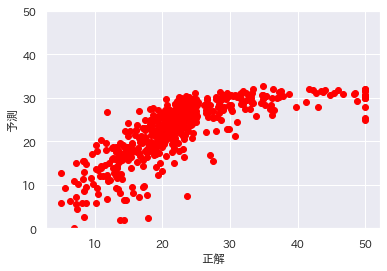

In [14]:
plt.scatter(y, y_pred, c = 'red') 
plt.xlabel('正解')
plt.ylabel('予測')
plt.ylim(0, 50)


### 回帰モデルの評価

回帰モデルを定量的に評価する尺度として、MSEと決定係数がよく使われます。

__MSE__

**平均二乗誤差 (Mean Squared Error)** とは、実際の値と予測値の絶対値の2乗を平均したものです。値が大きいほど誤差の多いモデルと言えます。計算式は以下となります。

$$
MSE(y, \hat{y}) = \frac{1}{n} \sum_{i=0}^{n} (y_i - \hat{y}_i)^2
$$

scikit-learn には、`sklearn.metrics.mean_squared_error` に計算用のメソッドが実装されており、以下のように利用できます。


In [15]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y, y_pred) 
print("MSE : ", mse) 

MSE :  38.28783286732932


__R2乗__

決定係数 (R2, R-squared, coefficient of determination) は、モデルの当てはまりの良さを示す指標で、最も当てはまりの良い場合、1.0 となります (当てはまりの悪い場合、マイナスとなることもあります)。寄与率とも呼ばれます。計算式は以下となります。

$$
R^2(y,\hat{y}) = 1 - \frac{\sum_{i=1}^n (y_i-\hat{y_i})^2 }{\sum_{i=1}^n (y_i-\bar{y})^2},　\\
\mbox{ただし、} \bar{y} = \frac{1}{n} \sum_{i=1}^n y_i
$$

In [16]:
from sklearn.metrics import r2_score
print('R squared error', r2_score(y, y_pred))

R squared error 0.5464577805111691


<div class="alert alert-info">

自由度調整済み決定係数

決定係数をモデルのパラメータ数で調整した指標です。パラメータ数の異なるモデルを比較するのに役立ちます。

```
def adjusted_r2(X,Y,model):
    r_squared = r2_score(Y, model.predict(X))
    adjusted_r2 = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    return adjusted_r2
```
</div>


<div class="alert alert-warning">

汎化性能の評価

機械学習や人工知能では、過去のデータではなく、
未来の**未知のデータ**に対する予測モデルの開発が重要になります。
今回は、既に正解のある過去のデータに対する予測性能を評価しているだけです。
次回、**ホールドアウト法**という未知のデータに対する汎化性能を評価する手法を紹介します。

</div>


## 仮説検証

データサイエンスの目的のひとつは、仮説検証によるより精度の高い予測モデルを作成することです。

犯罪率や部屋の数など色々なデータが入っていますね。
データを傍観する際は、色々な仮説を立てる癖をつけるといいと思います。
例えば、犯罪率が高いと住宅価格は下がりそうだなとか、部屋の数が増えると上がりそうだなみたいな感じです。
実際に分析して、仮説の検証をするのはデータ分析の醍醐味ですよ！




__帰無仮説__
”ある仮説”が正しいかどうかの判断のために立てられる仮説です。
たいていは否定されることを期待して立てられるます。
例えば、「コインを２０回投げたとき１４回表が出た としたらコインに歪みがないといえるか」という問題を考えた場合に、 「コインに歪みがない」という仮説にあたります。
また、これに対立している証明したい仮説を対立仮説といいます。

●有意水準
ある仮説を棄却するかしないかを決める基準の確率です。よくαで 表されます。
このα以下の確率を持つことは、”稀に起こること” と判断します。その結果、その仮説は棄却 されることになります。
例えば、コインを２０回投げたとき１４回表が出た としたらコインに歪みがないといえるか、という問題を考えます。 歪みがないという帰無仮説を「ｐ＝１/２」であらわすと、 帰無仮説が正しいなら、それがおきる確率は0.0577です。 このときα＝0.1とすると0.0577は稀に起こることであり有意に ずれていると判断され、帰無仮説は棄却されるが、α＝0.01とすると この確率は十分起こりうる＝ｐの２/１からのずれは有意ではないと判断されます。

### 仮説探索

データ分析と可視化を駆使して、住宅価格に影響を与える説明変数を分析していきます。

いくつかグラフを描画してみます。パラメータを直して自分なりに分析してみましょう。


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medv', ylabel='Density'>

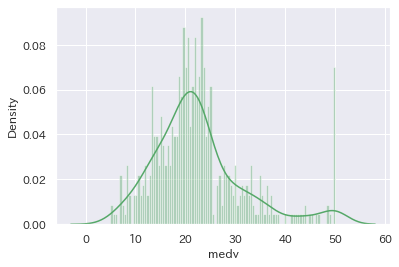

In [17]:
sns.distplot(data['medv'], color='g', bins=100, hist_kws={'alpha': 0.4})

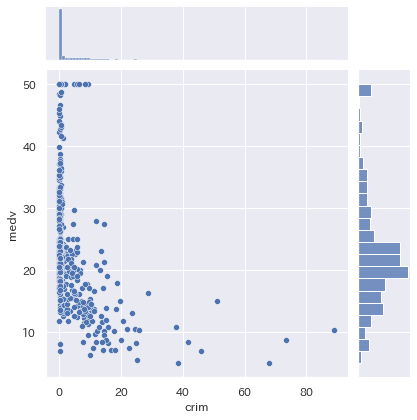

In [18]:
sns.jointplot(x="crim",y="medv",data=data)

ピアソンの相関係数だけではなく、帰無仮説(無相関)と設定した場合のp値も計算してくれるっぽいです。すばらしいですね。

有意確率 P 値は 0 に近いほどデータが偶然にそうなった可能性が低いと言える。 一般に、有意確率 P 値は 0.05 (5%) 未満のとき偶然ではないと考えることができるっぽい。

In [44]:
from scipy.stats import pearsonr
pearsonr(data['crim'], data['medv'])

(-0.38830460858681154, 1.1739870821941207e-19)

In [43]:
sns.jointplot(x='rm', y='medv', data=data)

AttributeError: 'JointGrid' object has no attribute '__annotations__'

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nox', ylabel='medv'>

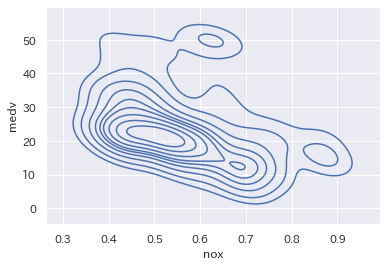

In [19]:
sns.kdeplot(data["nox"], data["medv"])

array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'lstat'}>],
       [<AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

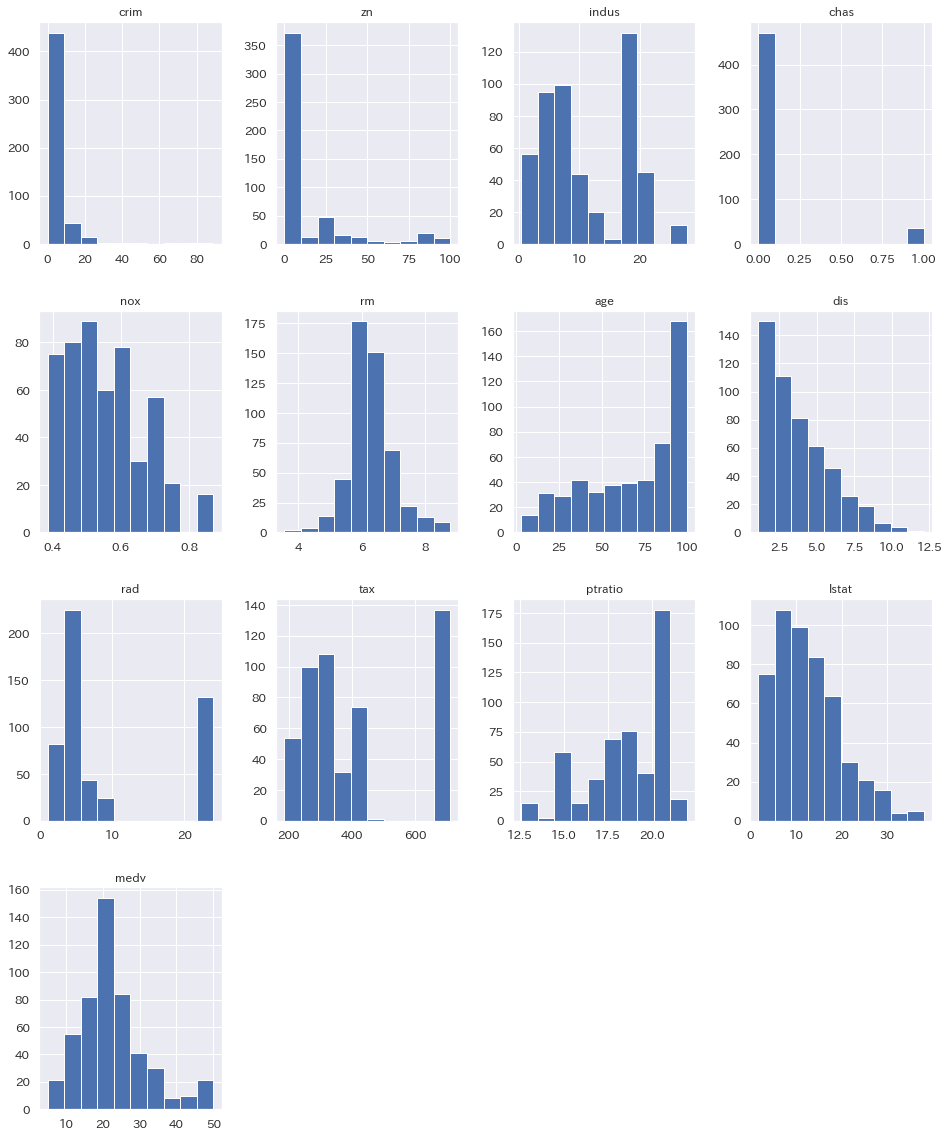

In [20]:
data.hist(figsize=(16, 20),xlabelsize=12, ylabelsize=12)

<AxesSubplot:>

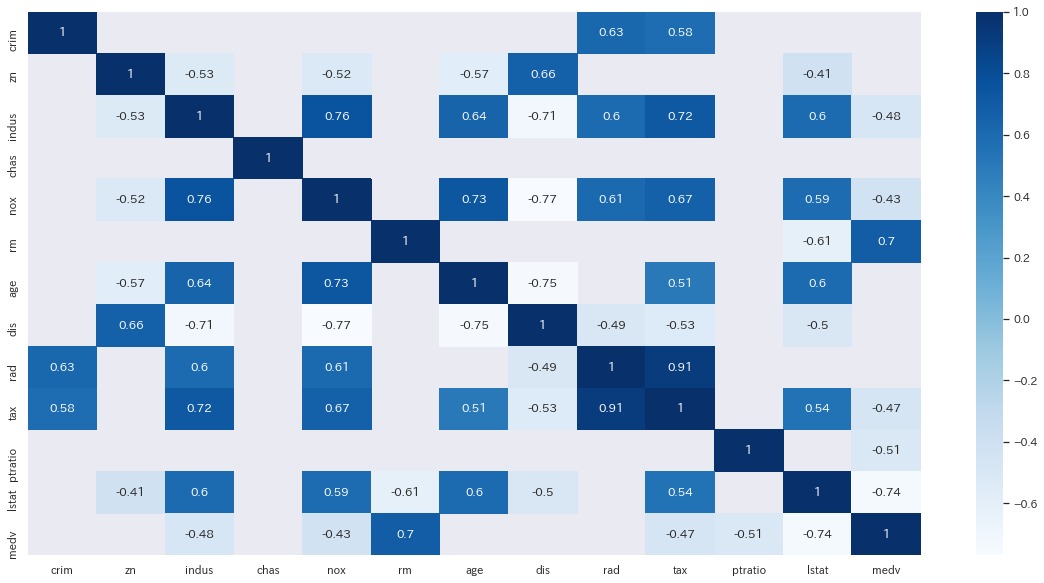

In [21]:
cor=data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor[(cor >= 0.5) | (cor <= -0.4)],annot=True,cmap='Blues')

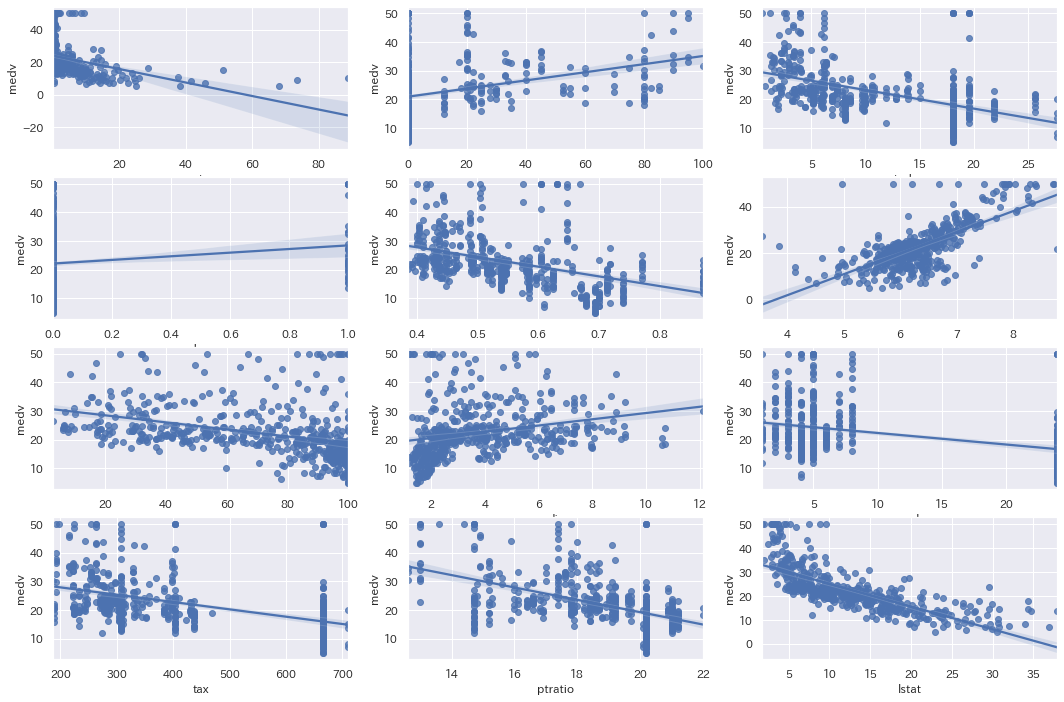

In [22]:
fig, ax = plt.subplots(round(len(data.columns) / 3), 3, figsize = (18, 12))
for i, ax in enumerate(fig.axes):
    if i < len(data.columns) - 1:
        sns.regplot(x=data.columns[i],y='medv',data=data[data.columns], ax=ax)

###　仮説を立てる

* 

## 教師データ

ボストンハウジング価格では、データセットからいくつかの属性を選んで住宅価格(`medv`)を予測する回帰モデルを作成します。


In [23]:
y = data['medv']
X = data.drop('medv', axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [26]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)


In [28]:
errs = pd.DataFrame({'正解': y_test, '予測値':y_pred})
errs

,正解,予測値
255,20.9,20.823160
93,25.0,29.881576
51,20.5,23.730619
158,24.3,29.661942
143,15.6,9.475540
...,...,...
482,25.0,29.004978
64,33.0,22.507794
194,29.1,31.934051
263,31.0,33.434335


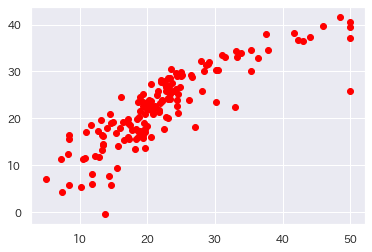

In [29]:
plt.scatter(y_test, y_pred, c = 'red') 

In [30]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test, y_pred) 
print("Mean Square Error : ", mse) 

Mean Square Error :  22.31048679460522


In [31]:
from sklearn.metrics import r2_score
print('R squared error', r2_score(y_test, y_pred))

R squared error 0.7299612353034716


https://www.kaggle.com/emilytries/regression-algorithm-approaches-in-boston-dataset
https://hinomaruc.hatenablog.com/entry/2019/11/15/223628

## ランダムフォレスト


In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train) 


RandomForestRegressor()

In [33]:
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred) 
print("Mean Square Error : ", mse) 
print('R squared error', r2_score(y_test, y_pred))



Mean Square Error :  8.44864858552632
R squared error 0.8977403474700396


## XgBoost




In [35]:
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train,y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

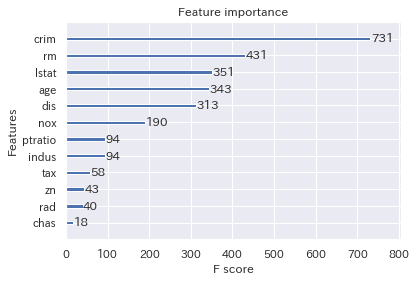

In [36]:
xgb.plot_importance(model)

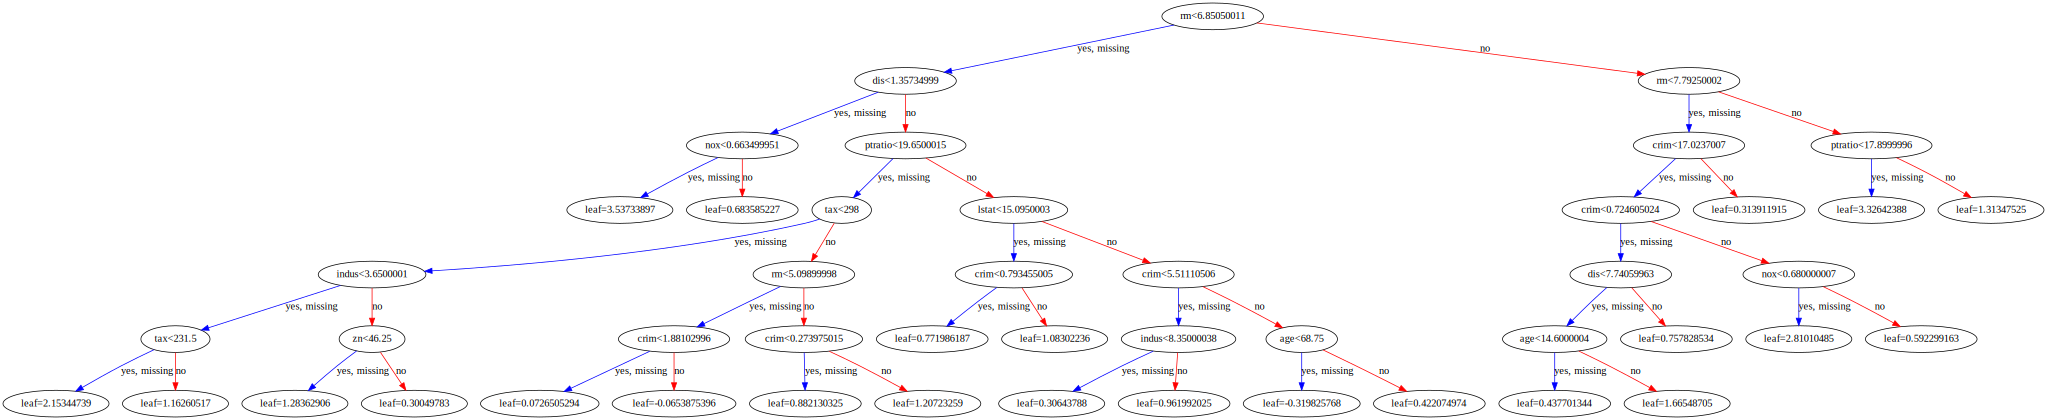

In [37]:
xgb.to_graphviz(model, num_trees=5)

In [38]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred) 
print("Mean Square Error : ", mse) 
print('R squared error', r2_score(y_test, y_pred))


Mean Square Error :  10.377569763980564
R squared error 0.8743933225027176


## コースワーク

<div class="admonition tip">

**例題（ボストンハウジング）**

1. 決定係数`0.75`を超える回帰モデルを構築してみよう。
2. ランダムフォレスト


</div>

__(ヒント) ランダムフォレスト__

```
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X,y) 
```

__（ヒント）__

勾配ブーストを用いた決定木(GBDT)によるクラス分類や回帰はデータ分析コンペでも非常によく使われています。

https://arxiv.org/abs/1603.02754

その中でも2016年に出されたXGBoostはLightGBMと並びよく使われている手法です。
性能が良いことで有名なXGBoost, LightGBMですが、モデル内部でどのような処理が行われているかよくわかっていなかったので論文を読んでみました。

```
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train,y_train) 
```
